# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset

####################################################
dataset="pancreas"
ncelltype=13
####################################################

read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")


# scDML(reassign)

In [2]:
method="scDML"
args_integrated=read_dir+method+"/"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
print("ARI={}".format(ARI))
print("NMI={}".format(NMI))
results = {
'ARI': np.round(ARI,3),
'NMI': np.round(NMI,3),
'ASW_label': "--",
'ASW_label/batch': "--",
#'kBET': kBET_value[0],
 'BatchKL':"--",
 'cLISI':"--",  
 'iLISI':"--"
}
print("....................................... calculate all metric done .................................")
scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
scDML_reassign.columns=[method+"(reassign)"]
scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
#scDML_reassign


AnnData object with n_obs × n_vars = 14890 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
ARI=0.9540296220282884
NMI=0.930451271852057
....................................... calculate all metric done .................................


# scDML(louvain)

AnnData object with n_obs × n_vars = 14890 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
...................................................................................................
..........................................method=scDML.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.48828125):n_cluster=13
ARI: 0.9540016892385398
NMI: 0.9303002882631048
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.6790643

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 3.3004315077029287
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.8243490755558014
ASW_label/batch= 0.8718606699327632
............................

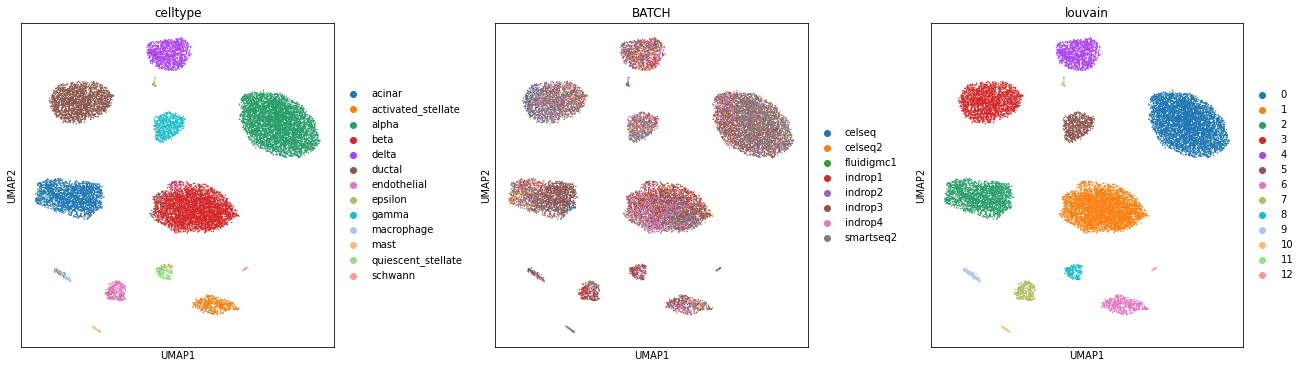

                 scDML(louvain)
ARI                       0.954
NMI                       0.930
ASW_label                 0.824
ASW_label/batch           0.872
BatchKL                   0.679
cLISI                     1.000
iLISI                     3.300


In [3]:
method="scDML"
args_integrated=read_dir+method+"/"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scDML3_eva.columns=[method+"(louvain)"] ## modify column names
scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
print(scDML3_eva)

adata_integrated.write_h5ad(save_dir+method+dataset+"_"+method+"_evaluated.h5ad")


# fastMNN

AnnData object with n_obs × n_vars = 14890 × 34363
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    varm: 'MNN'
    obsp: 'distances'
AnnData object with n_obs × n_vars = 14890 × 50
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
...................................................................................................
..........................................method=fastMNN.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.579833984375):n_cluster=13
ARI: 0.8095121939489314
NMI: 0.862185844861396
...........

... storing 'orig.ident' as categorical
... storing 'tech' as categorical
... storing 'replicate' as categorical
... storing 'assigned_cluster' as categorical
... storing 'celltype' as categorical
... storing 'dataset' as categorical
... storing 'BATCH' as categorical
... storing 'ident' as categorical


ASW_label= 0.6579171717166901
ASW_label/batch= 0.895318886852547
....................................... calculate all metric done .................................


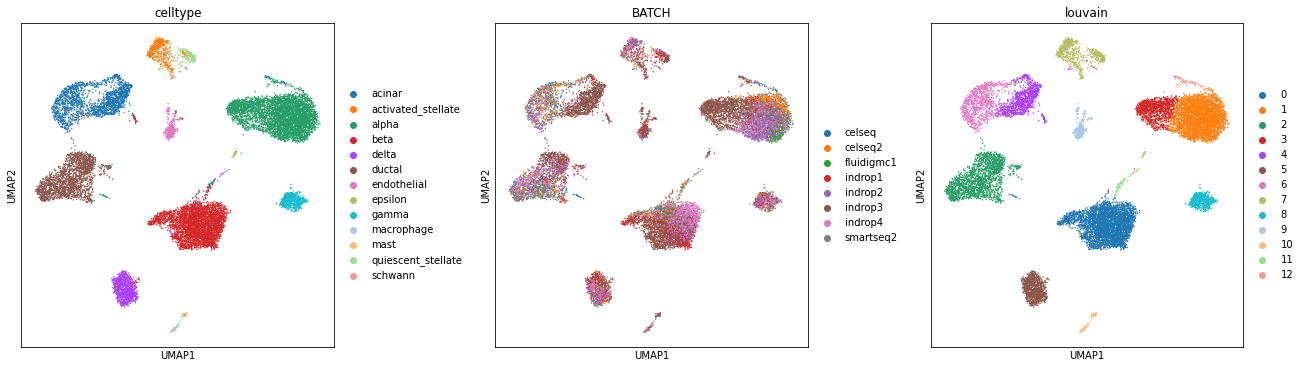

                 fastMNN
ARI                0.810
NMI                0.862
ASW_label          0.658
ASW_label/batch    0.895
BatchKL            1.078
cLISI              1.000
iLISI              2.360


In [4]:
method="fastMNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

adata_fastMNN=sc.read_h5ad(args_integrated)
print(adata_fastMNN)

adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
adata_mnn.obs=adata_fastMNN.obs.copy()
print(adata_mnn)
# sc.tl.pca(adata_mnn)
# sc.pp.neighbors(adata_mnn)
# sc.tl.umap(adata_mnn)
# sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
########################################################
adata_integrated=adata_mnn.copy()
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(fastMNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

AnnData object with n_obs × n_vars = 14890 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 14890 × 30
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident'
...................................................................................................
..........................................method=harmony.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.9

... storing 'orig.ident' as categorical
... storing 'tech' as categorical
... storing 'replicate' as categorical
... storing 'assigned_cluster' as categorical
... storing 'celltype' as categorical
... storing 'dataset' as categorical
... storing 'BATCH' as categorical


ASW_label= 0.6630698144435883
ASW_label/batch= 0.8810389946874749
....................................... calculate all metric done .................................


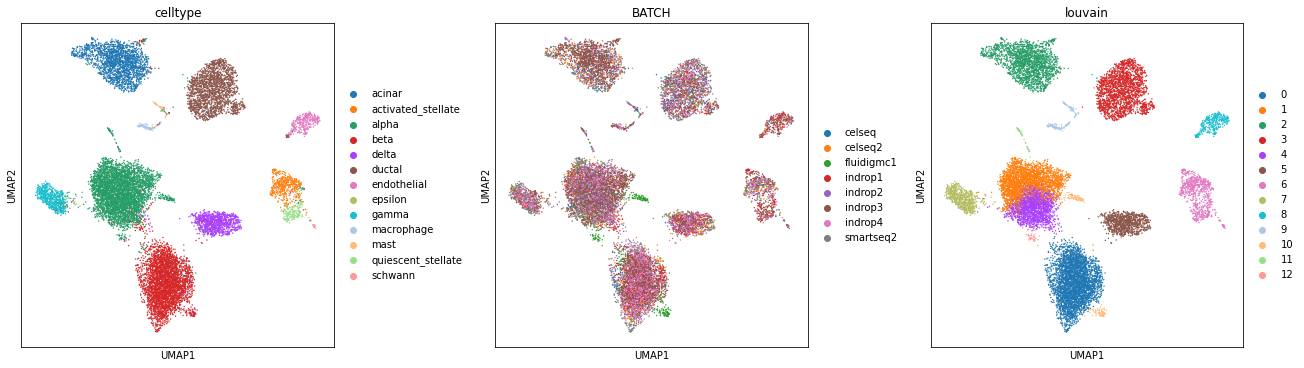

                 harmony
ARI                0.766
NMI                0.838
ASW_label          0.663
ASW_label/batch    0.881
BatchKL            0.784
cLISI              1.000
iLISI              2.944


In [5]:
method="harmony"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
adata_harmony.obs=adata_integrated.obs.copy()
print(adata_harmony)
# sc.tl.pca(adata_harmony)
# sc.pp.neighbors(adata_harmony)
# sc.tl.umap(adata_harmony)
# sc.pl.umap(adata_harmony,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_harmony.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(harmony_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Seurat3

AnnData object with n_obs × n_vars = 14890 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident'
    var: 'features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
...................................................................................................
..........................................method=Seurat3.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.8544921875):n_cluster=13
ARI: 0.8200024617799537
NMI: 0.8772320769431452
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.6542427

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 3.3755258316494055
..................................        calculate ASW      ....

... storing 'orig.ident' as categorical
... storing 'tech' as categorical
... storing 'replicate' as categorical
... storing 'assigned_cluster' as categorical
... storing 'celltype' as categorical
... storing 'dataset' as categorical
... storing 'BATCH' as categorical
... storing 'ident' as categorical


ASW_label= 0.7230984270572662
ASW_label/batch= 0.8867047474525809
....................................... calculate all metric done .................................


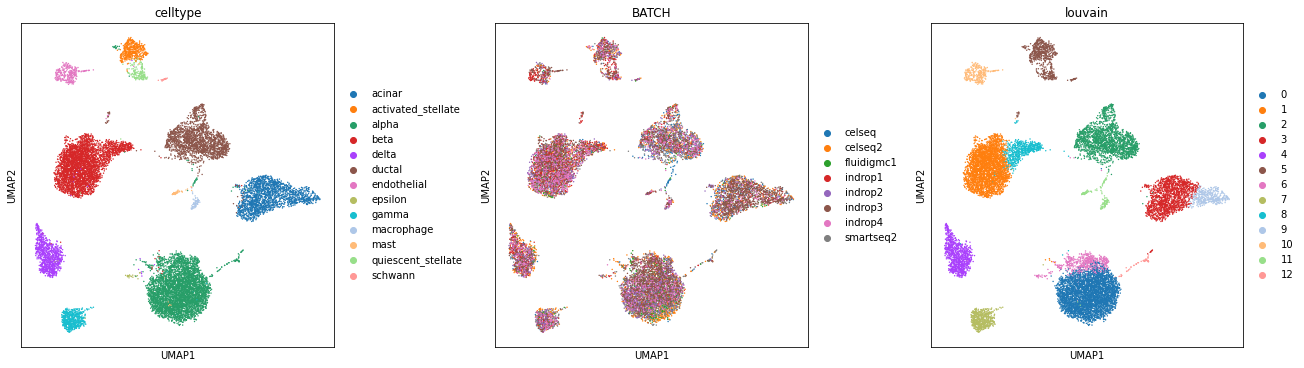

                 Seurat3
ARI                0.820
NMI                0.877
ASW_label          0.723
ASW_label/batch    0.887
BatchKL            0.654
cLISI              1.000
iLISI              3.376


In [6]:
###################################################################
method="Seurat3"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
sc.tl.pca(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(Seurat3_eva)

adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama

AnnData object with n_obs × n_vars = 14890 × 1000
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=scanorama.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.3662109375):n_cluster=13
ARI: 0.7965297886106764
NMI: 0.8117752346843383
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.423182

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 2.173988314030728
..................................        calculate ASW      ..............................

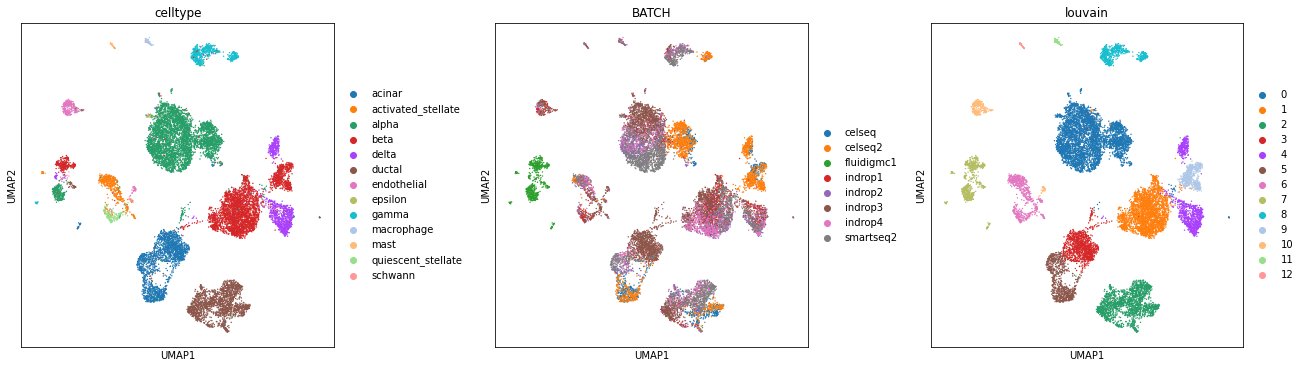

                 scanorama
ARI                  0.797
NMI                  0.812
ASW_label            0.598
ASW_label/batch      0.813
BatchKL              1.423
cLISI                1.000
iLISI                2.174


In [7]:
###################################################################
method="scanorama"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()

adata_integrated,scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scanorama_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

AnnData object with n_obs × n_vars = 14890 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=INSCT.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.164031982421875):n_cluster=13
ARI: 0.49038725457154453
NMI: 0.7088507921264293
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.9942857

.................................. calculate LISI..................................................
clisi= 1.0005089197814563
ilisi= 3.087286391152229
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.661841869354248
ASW_label/batch= 0.69

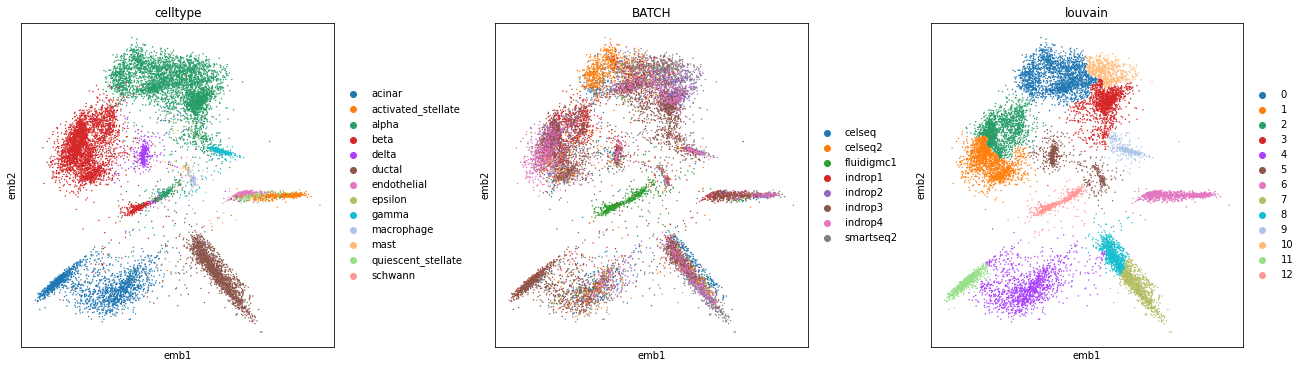

                 INSCT
ARI              0.490
NMI              0.709
ASW_label        0.662
ASW_label/batch  0.692
BatchKL          0.994
cLISI            1.001
iLISI            3.087


In [8]:
method="INSCT"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(INSCT_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

AnnData object with n_obs × n_vars = 14890 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=BBKNN.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.152587890625):n_cluster=13
ARI: 0.5865893090483261
NMI: 0.7889502192175347
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.322569

.................................. calculate LISI..................................................
clisi= 1.0012615322981535
ilisi= 2.341741237905779
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.7035651355981827
ASW_label/batch= 0.690296

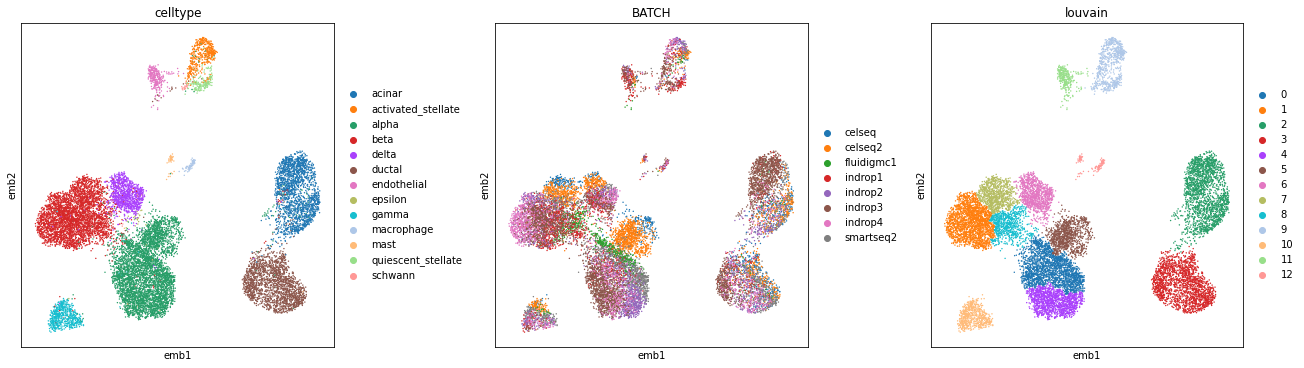

                 BBKNN
ARI              0.587
NMI              0.789
ASW_label        0.704
ASW_label/batch  0.690
BatchKL          1.323
cLISI            1.001
iLISI            2.342


In [9]:
method="BBKNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(BBKNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

AnnData object with n_obs × n_vars = 14890 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident', 'clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_iNMF', 'X_iNMF_raw', 'X_umap'
    varm: 'INMF_RAW'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 14890 × 20
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH', 'cellname', 'ident', 'clusters'
...................................................................................................
..........................................method=liger.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering res

... storing 'orig.ident' as categorical
... storing 'tech' as categorical
... storing 'replicate' as categorical
... storing 'assigned_cluster' as categorical
... storing 'celltype' as categorical
... storing 'dataset' as categorical
... storing 'BATCH' as categorical


ASW_label= 0.6297752261161804
ASW_label/batch= 0.8265255324494931
....................................... calculate all metric done .................................


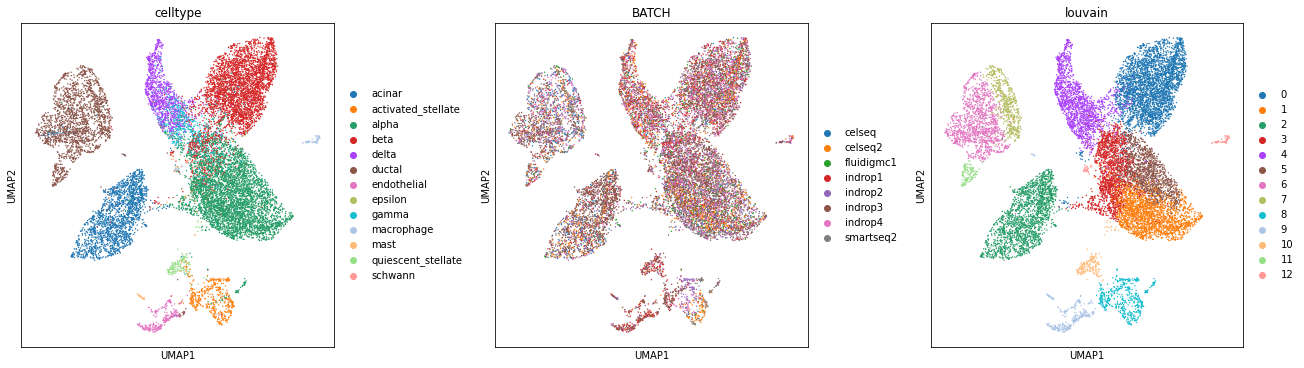

                 liger
ARI              0.586
NMI              0.701
ASW_label        0.630
ASW_label/batch  0.827
BatchKL          0.438
cLISI            1.002
iLISI            3.998


In [10]:
method="liger"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
adata_liger.obs=adata_integrated.obs.copy()
print(adata_liger)
# sc.tl.pca(adata_liger)
# sc.pp.neighbors(adata_liger)
# sc.tl.umap(adata_liger)
# sc.pl.umap(adata_liger,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_liger.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(liger_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BERMUDA

../evaluation/pancreas/BERMUDA/pancreas_BERMUDA_corrected.h5ad
AnnData object with n_obs × n_vars = 14890 × 20
    obs: 'celltype', 'BATCH'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_umap'
...................................................................................................
..........................................method=BERMUDA.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.732421875):n_cluster=13
ARI: 0.6581816546361073
NMI: 0.7928195348705969
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.070497

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 2.6730966310718753
..................................        calculate ASW      ......................................
Silhouette score...
ASW_l

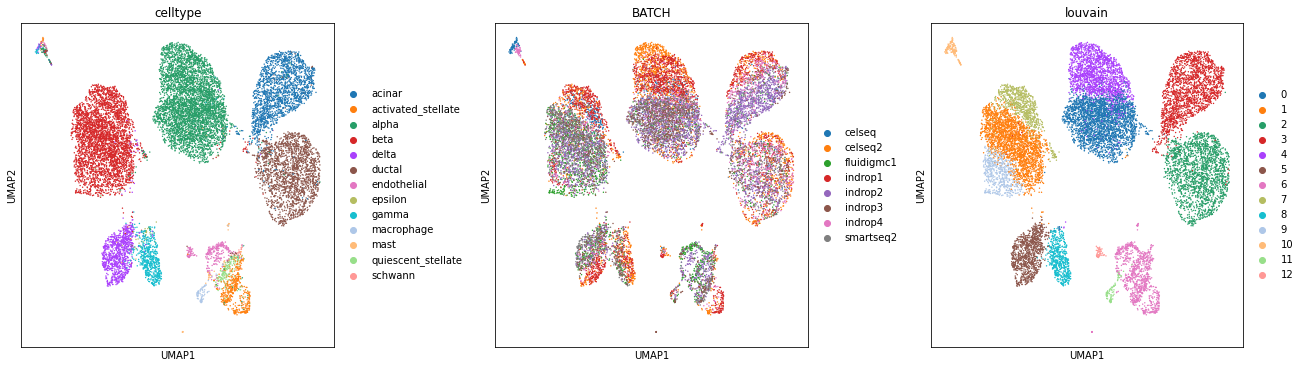

                 BERMUDA
ARI                0.658
NMI                0.793
ASW_label          0.525
ASW_label/batch    0.810
BatchKL            1.070
cLISI              1.000
iLISI              2.673


In [11]:
method="BERMUDA"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
if(os.path.exists(args_integrated)):
    print(args_integrated)
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
    # sc.tl.pca(adata_integrated)
    # sc.pp.neighbors(adata_integrated)
    # sc.tl.umap(adata_integrated)
    # sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(bermuda_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
else:
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()    
    results = {
    'ARI': "--",
    'NMI': "--",
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
    bermuda_eva.columns=[method]
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    bermuda_eva
    #scDML_reassign

# scVI

AnnData object with n_obs × n_vars = 14890 × 10
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=scVI.............................................
..............................calculate ari nmi according to nceltype=13...........................
louvain clustering result(resolution=0.79345703125):n_cluster=13
ARI: 0.7797225302239807
NMI: 0.860720616913952
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.031712

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 2.4951313735921072
..................................        calculate ASW      ....................................

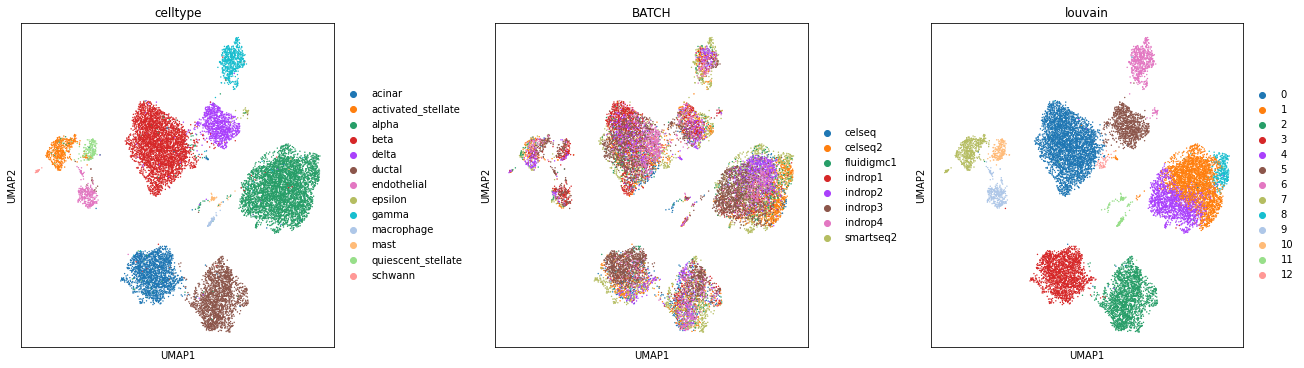

                  scVI
ARI              0.780
NMI              0.861
ASW_label        0.618
ASW_label/batch  0.877
BatchKL          1.032
cLISI            1.000
iLISI            2.495


In [12]:
method="scVI"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scVI_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [ ]:
#method_list=["tDCA","fastMNN","harmony","Seurat3","scanorama","INSCT","scVI","BBKNN","liger"]
method_list=["scDML","fastMNN","harmony","Seurat3","scanorama","INSCT","BBKNN","liger","BERMUDA","scVI"]

df_ls=[]
for method in method_list:
    print(method)
    if(method=="scDML"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["scDML(reassign)","scDML(louvain)"]+method_list[1:]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result
#liger

# Visulization of Evaluation

## ARI and NMI

In [ ]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ARI_list=result.loc["ARI"].values
# NMI_list=result.loc["NMI"].values
# Name_list = list(result.columns)
# ax.scatter(ARI_list, NMI_list, c = colors) 
# ax.set_xlabel("ARI", fontsize = 10)
# ax.set_ylabel("NMI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ARI_list)):
#     ax.text(ARI_list[i], NMI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("Clustering Accuracy")    
# plt.savefig(save_dir+dataset+"_ARI_NMI.png")
# # ax=plt.subplot(1, 3, 3) 
# # kBET_list=result.loc["kBET"].values
# # batchKL_list=result.loc["BatchKL"].values
# # Name_list = list(result.columns)
# # ax.scatter(kBET_list, batchKL_list, c = colors) 
# # ax.set_xlabel("kBET", fontsize = 10)
# # ax.set_ylabel("BatchKL", fontsize = 10)
# # plt.xticks(fontsize = 10)
# # plt.yticks(fontsize = 10)
# # for i in range(len(kBET_list)):
# #     ax.text(kBET_list[i], batchKL_list[i], Name_list[i], c=colors[i],  fontsize=20, weight =1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# # plt.title("Mixing Accuracy")

## ASW

In [ ]:
# # Plot LISI results 
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ASW_list=result.loc["ASW_label"].values
# ASW_batch_list=1-result.loc["ASW_label/batch"].values
# Name_list = list(result.columns)
# ax.scatter(ASW_list, ASW_batch_list, c = colors) 
# ax.set_xlabel("ASW_label", fontsize = 10)
# ax.set_ylabel("1-ASW_label/batch", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ASW_list)):
#     ax.text(ASW_list[i], ASW_batch_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("ASW")
# plt.savefig(save_dir+dataset+"_ASW.png")


## batchKL

In [ ]:
# fig=plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# bKL=pd.DataFrame({"method":result.columns,"BatchKL":result.loc["BatchKL"].values})
# #bKL
# ax = sns.barplot(x = "method", y = "BatchKL", data=bKL)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.ylabel("BatchKL", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.title("BatchKL")
# plt.savefig(save_dir+dataset+"_BatchKL.png")

## iLISI和cLISI

In [ ]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# cLISI_list=result.loc["cLISI"].values
# iLISI_list=result.loc["iLISI"].values
# Name_list = list(result.columns)
# ax.scatter(cLISI_list, iLISI_list, c = colors) 
# ax.set_xlabel("cLISI", fontsize = 10)
# ax.set_ylabel("iLISI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(cLISI_list)):
#     ax.text(cLISI_list[i], iLISI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("LISI")    
# plt.savefig(save_dir+dataset+"_LISI.png")